In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('Fraud.csv')

print(data.head())

print(data.columns.tolist())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', '

In [3]:
target = 'isFraud'
features = data.drop(columns=[target, 'type', 'nameOrig', 'nameDest']).columns.tolist()

# Prepare the feature and target variables
X = data[features]
y = data[target]

# Handle missing values by dropping rows with missing values for simplicity
data = data.dropna()

In [4]:
# Select only numeric columns for outlier detection and removal
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'type']  # Exclude 'PAYMENT'

# Handle outliers using IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

C:\Users\Aditya Bankar\anaconda3\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


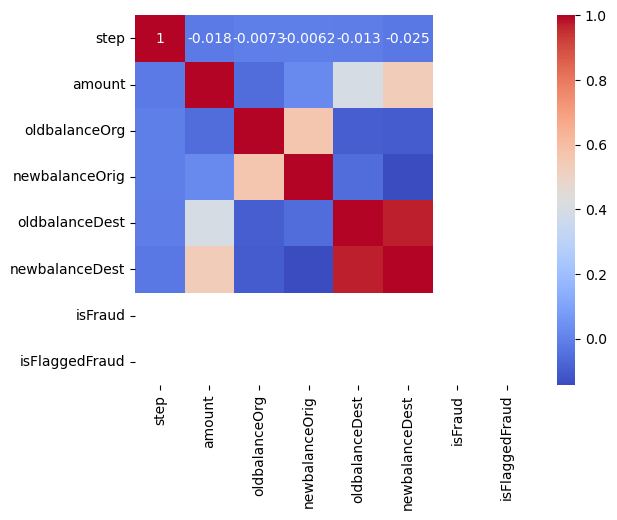

In [5]:
# Filtering out the outliers
data = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\Aditya Bankar\anaconda3\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 148s 1ms/step - accuracy: 0.9991 - loss: 0.0074 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 2/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 173s 2ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9994 - val_loss: 0.0056
Epoch 3/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 162s 1ms/step - accuracy: 0.9993 - loss: 0.0053 - val_accuracy: 0.9994 - val_loss: 0.0082
Epoch 4/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 149s 1ms/step - accuracy: 0.9994 - loss: 0.0051 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 5/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 161s 1ms/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 6/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 177s 2ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 7/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 156s 1ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/10
111346/111346 ━━━━━━━━━━━━━━━━━━━━ 15

In [10]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


59650/59650 ━━━━━━━━━━━━━━━━━━━━ 58s 969us/step
[[1906294      57]
 [   1092    1343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.55      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.78      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

